In [6]:
import pandas as pd
file_path = r"C:\Users\Maximiliano\Downloads\auto-mpg.csv"


df = pd.read_csv(file_path)

# imprimir csv para ver contenido
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


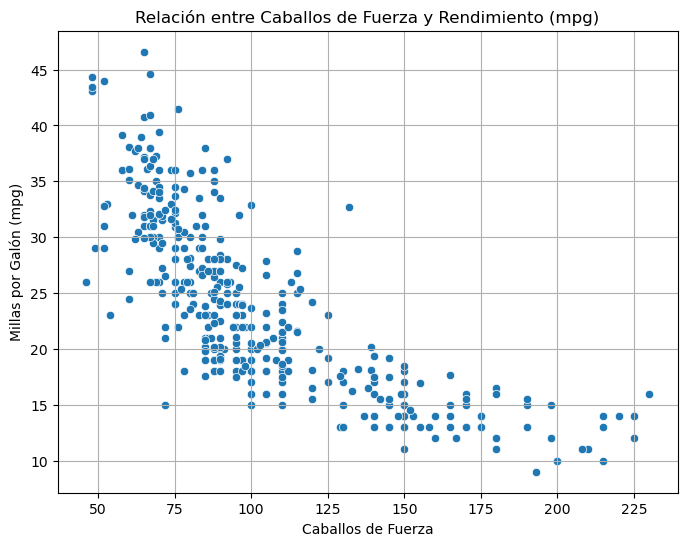

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# gráfico de caballos de fuerza y rendimiento
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='horsepower', y='mpg')
plt.title('Relación entre Caballos de Fuerza y Rendimiento (mpg)')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('Millas por Galón (mpg)')
plt.grid(True)
plt.show()


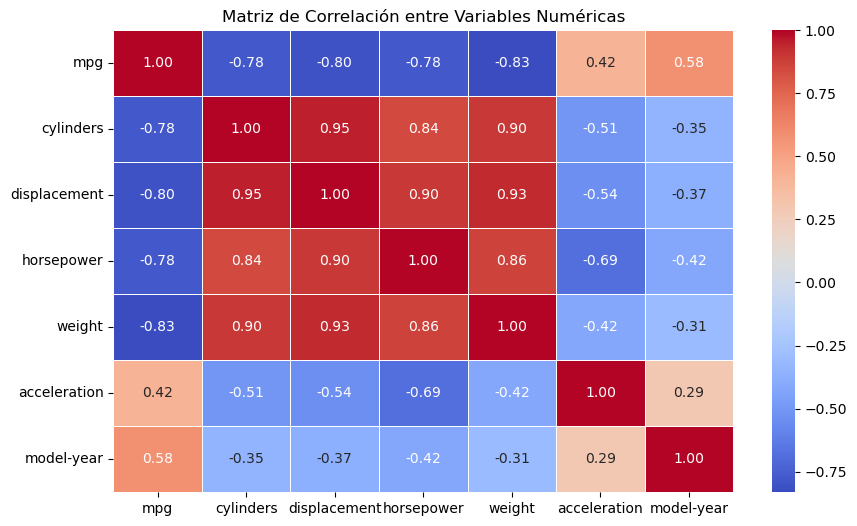

In [10]:

plt.figure(figsize=(10, 6))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('matriz de correlacion entre variables')
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# la variable predictora con mayor correlacion: weight
X = df[['weight']]
y = df['mpg']

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# ecuacion del modelo
print(f"mpg = {modelo.coef_[0]:.4f} * weight + {modelo.intercept_:.4f}")


mpg = -0.0078 * weight + 46.7821


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación R²: {r2:.2f}")


Error cuadrático medio (MSE): 14.89
Coeficiente de determinación R²: 0.72


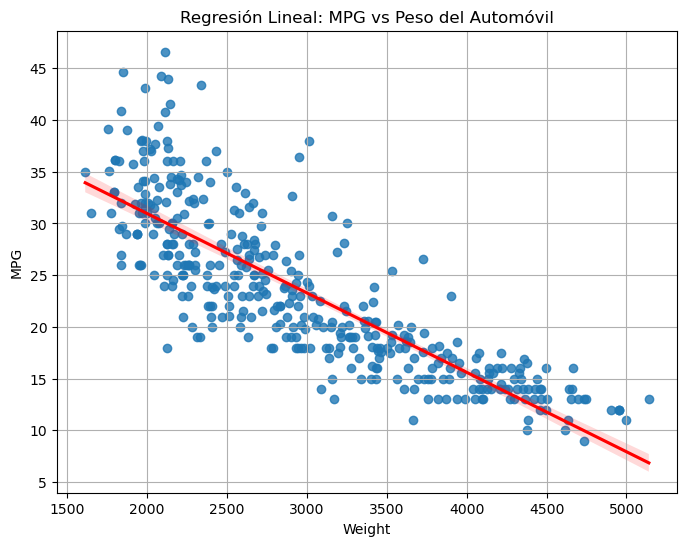

In [18]:

plt.figure(figsize=(8, 6))
sns.regplot(x='weight', y='mpg', data=df, line_kws={"color": "red"})
plt.title('Regresión Lineal: MPG vs Peso del Auto')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()
